# Author : Mohammed Saqlain Attar

## 1.Open and display the image “dog.jpeg”. Convert the image in to numpy array,so that i can be   used in further processing.[Hint:Use PIL module from python]

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

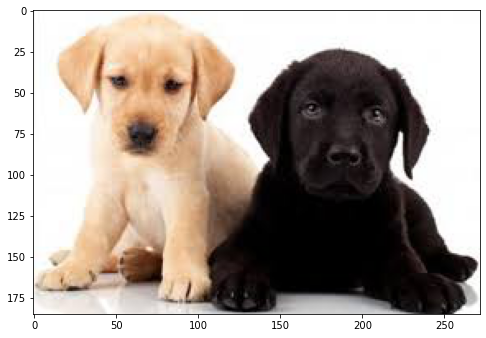

In [2]:
image = imread(r'C:\Users\saqla\Desktop\Python Certification for Data Science\Case Studies\Module 10\Datasets\dogs.jpeg')

plt.figure(figsize=(8,8))
plt.imshow(image)

In [3]:
image

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[252, 248, 249],
        [254, 250, 251],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 245, 246],
        [250, 248, 249],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [244, 244, 244]],

       [[253, 251, 254],
        [253, 251, 254],
        [253, 251, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

## 2. Find out the dimensions of the image and convert it in to a two-dimensional array.

In [4]:
image.shape    # (185,272 - height, width, 3 - color channels (each pixel stores the intensity of RGB))

(185, 272, 3)

In [5]:
image = image.reshape(-1,3)

In [6]:
image.shape

(50320, 3)

In [7]:
image

array([[240, 240, 240],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [8]:
image.max()

255

### Scaling the image

In [9]:
image = image/image.max()

In [10]:
image

array([[0.94117647, 0.94117647, 0.94117647],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       ...,
       [0.99607843, 0.99607843, 0.99607843],
       [0.99607843, 0.99607843, 0.99607843],
       [0.99607843, 0.99607843, 0.99607843]])

## 3.Use kmeans clustering with k set to 3 and cluster the image.[Hint: Refer to k-means module of scikit learn]

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3)

In [13]:
kmeans.fit(image)

KMeans(n_clusters=3)

In [14]:
import numpy as np

unique, counts = np.unique(kmeans.labels_, return_counts=True)

print(dict(zip(unique,counts)))

{0: 12291, 1: 18294, 2: 19735}


## 4. Predict the cluster label of every pixel in the image and plot it back as an image

### Recreate the image

In [15]:
centroids = kmeans.cluster_centers_
centroids # R            G           B

array([[0.82616198, 0.68667339, 0.56537513],
       [0.11531357, 0.08429204, 0.08000786],
       [0.98684913, 0.97227764, 0.95487309]])

### Find the pixels that were assigned to each of the centroids

In [16]:
image_seg = centroids[kmeans.labels_]

In [17]:
image_seg

array([[0.98684913, 0.97227764, 0.95487309],
       [0.98684913, 0.97227764, 0.95487309],
       [0.98684913, 0.97227764, 0.95487309],
       ...,
       [0.98684913, 0.97227764, 0.95487309],
       [0.98684913, 0.97227764, 0.95487309],
       [0.98684913, 0.97227764, 0.95487309]])

### Reshape to original shape of the image

In [18]:
image_seg = image_seg.reshape(185, 272, 3)

### Plot the image

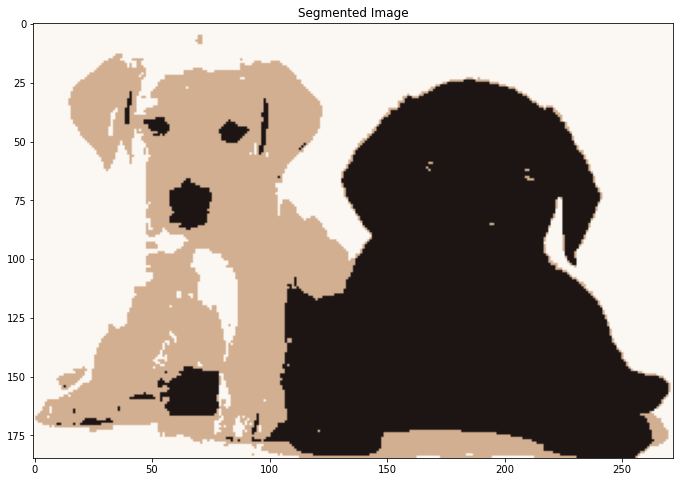

In [19]:
plt.figure(figsize=(12,8))

plt.title('Segmented Image')
plt.imshow(image_seg)

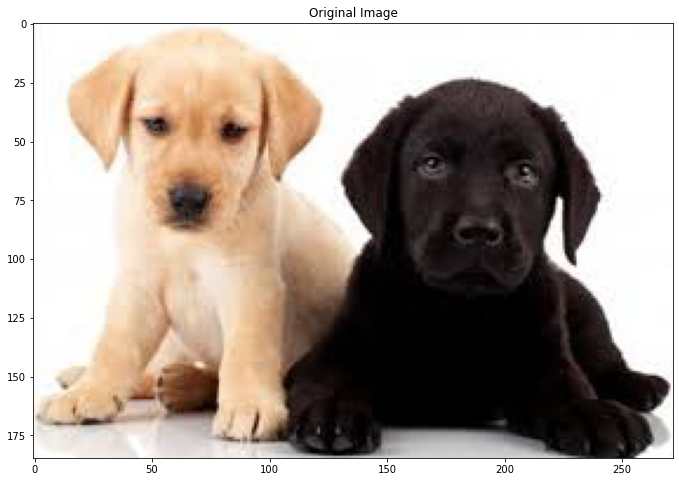

In [20]:
plt.figure(figsize=(12,8))
plt.title('Original Image')
plt.imshow(image.reshape(185, 272, 3))

## 5. Find out the three dominant color in the image.[Hint: The cluster centers should correspond to three dominant colors]

In [21]:
centroids

array([[0.82616198, 0.68667339, 0.56537513],
       [0.11531357, 0.08429204, 0.08000786],
       [0.98684913, 0.97227764, 0.95487309]])

In [22]:
centroids.shape

(3, 3)

### Reshape the cluster centers(centroids) to 1×k×3 where k is the number of clusters. Also image must be scaled.

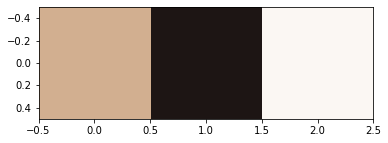

In [23]:
plt.imshow(centroids.reshape(1,3,3))